In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pycbc
from pycbc.inference import io, models
import lal
from pycbc import conversions
from pycbc import cosmology
from pycbc import transforms
from pycbc import waveform
from pycbc.detector import Detector

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [2]:
# read in the data
fp =  io.loadfile('/work/yifan.wang/projects/whu/imrd/run_output/posterior_files/H1L1V1-EXTRACT_POSTERIOR_GW150914-1126259200-400.hdf', 'r')
data = fp.read_data()                                                           
psds = fp.read_psds()                                                           
samples = fp.read_samples(list(fp['samples'].keys()))
idx = samples['loglikelihood'].argmax()
params = {p: samples[p][idx] for p in samples.fieldnames}
cp = fp.read_config_file()

In [ ]:
model.

In [3]:
params['redshift'] = cosmology.redshift(params['distance'])
params['comoving_volume'] = cosmology.cosmological_quantity_from_redshift(params['redshift'],'comoving_volume')

In [4]:
params

{'delta_tc': -0.016086043891128263,
 'chi_p': 0.5433945536430053,
 'polarization': 1.6643501677489465,
 'spin2_a': 0.7194541295965214,
 'ra': 2.372476417582858,
 'spin1_a': 0.551191055292039,
 'spin2_polar': 1.7324870936198162,
 'loglikelihood': -341344.3825037491,
 'dec': -1.1778699851348244,
 'spin1_polar': 1.402402155186747,
 'srcmass2': 27.493543682014575,
 'spin1_azimuthal': 5.026454113692085,
 'spin2_azimuthal': 1.4937668923810439,
 'srcmchirp': 28.199434228865467,
 'q': 1.3958390249898807,
 'distance': 468.12205533177655,
 'redshift': 0.09857543498595722,
 'srcmass1': 38.37656120661992,
 'logwt': -341387.530181956,
 'coa_phase': 3.476125892993517,
 'inclination': 2.3594242642214205,
 'chi_eff': 0.0054777422592172205,
 'comoving_volume': 324097923.74066025}

In [5]:
#set up the model
model = models.read_from_config(cp, data=data, psds=psds)
model.update(**params)
_ = model.loglikelihood

In [7]:
wfs = model.waveform_generator.generate(**model.current_params)

In [9]:
whdata={}

for det in data:
    d = data[det]
    d = d.copy()
    d *= model.weight[det] / (4*psds[det].delta_f)**0.5
    whdata[det] = d.to_timeseries()

whwaveform = {}
for detname in wfs:
    whitend_hs = {}
    det = Detector(detname)
    h = wfs[detname]
    h.resize(len(model.weight[detname]))
    flow = model.current_params['f_lower']
    #hs[detname] = pycbc.waveform.fd_to_td(h, left_window=(flow, flow+5))
    wh = h.copy()
    wh *= model.weight[detname] / (4*model.psds[detname].delta_f)**0.5
    whitend_hs[detname] = wh.to_timeseries()
    whwaveform.update(whitend_hs)

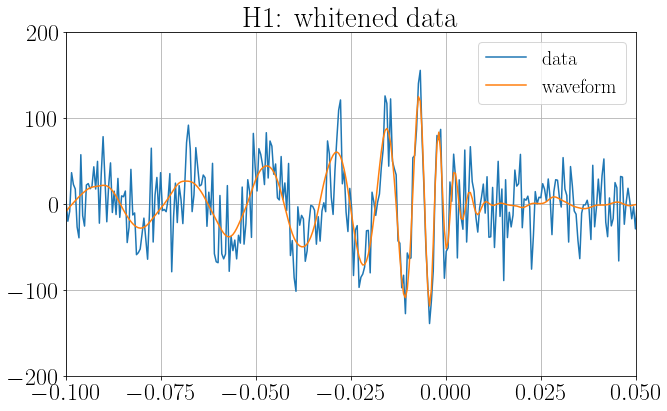

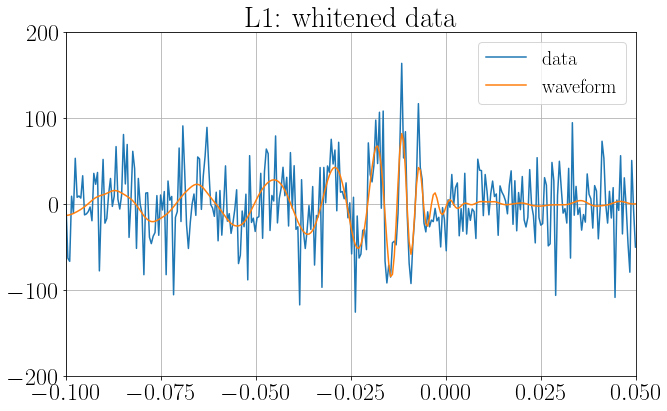

In [10]:
for det in whdata:
    plt.figure()
    plt.plot(whdata[det].sample_times-model.static_params['trigger_time'],whdata[det],label='data')
    plt.plot(whwaveform[det].sample_times-model.static_params['trigger_time'],whwaveform[det],label='waveform')
    plt.xlim(-0.1,0.05)
    plt.ylim(-200,200)
    plt.title(str(det)+': whitened data')
    plt.legend()

In [11]:
def plot_waveform(params):
    model.update(**params)
    _ = model.loglikelihood
    wfs = model.waveform_generator.generate(**model.current_params)
    whwaveform = {}
    for detname in wfs:
        whitend_hs = {}
        det = Detector(detname)
        h = wfs[detname]
        h.resize(len(model.weight[detname]))
        flow = model.current_params['f_lower']
        wh = h.copy()
        wh *= model.weight[detname] / (4*model.psds[detname].delta_f)**0.5
        whitend_hs[detname] = wh.to_timeseries()
        whwaveform.update(whitend_hs)
    for det in whdata:
        plt.figure()
        plt.plot(whdata[det].sample_times-model.static_params['trigger_time'],whdata[det],label='data')
        plt.plot(whwaveform[det].sample_times-model.static_params['trigger_time'],whwaveform[det],label='waveform')
        plt.xlim(-0.1,0.05)
        plt.ylim(-200,200)
        plt.title(str(det)+': whitened data')
        plt.legend()

-10
17665
-9
960
-8
47631
-7
45215
-6
54182
-5
6672
-4
65900
-3
9324
-2
40899


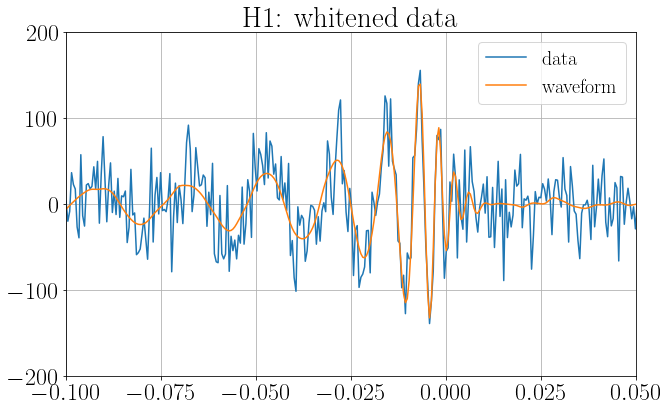

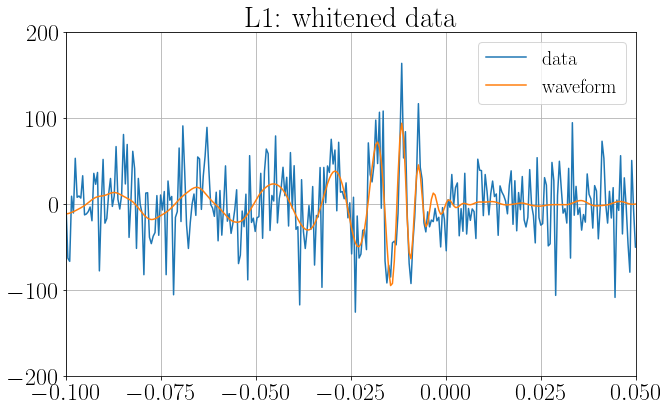

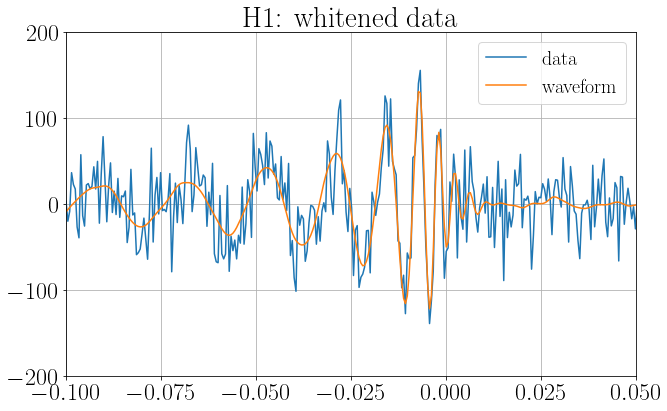

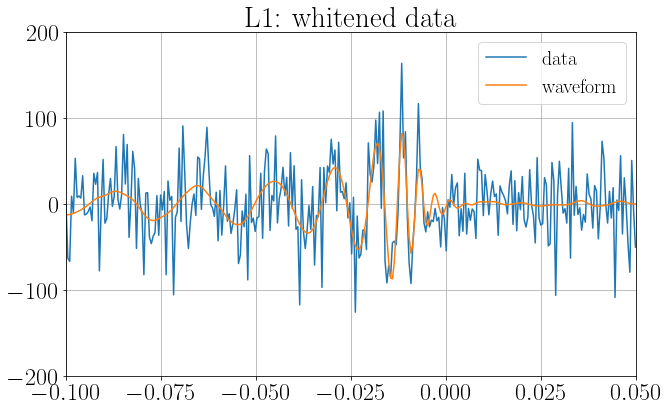

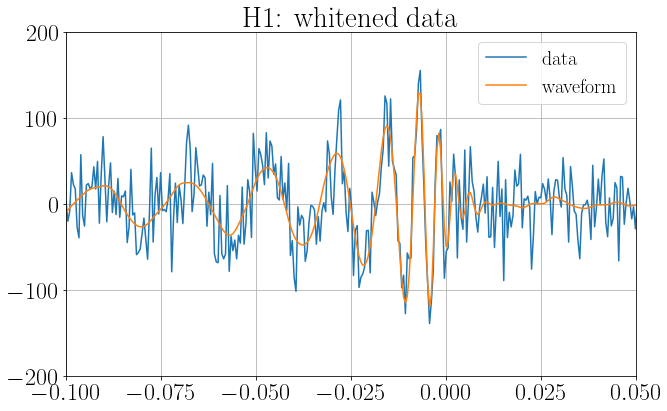

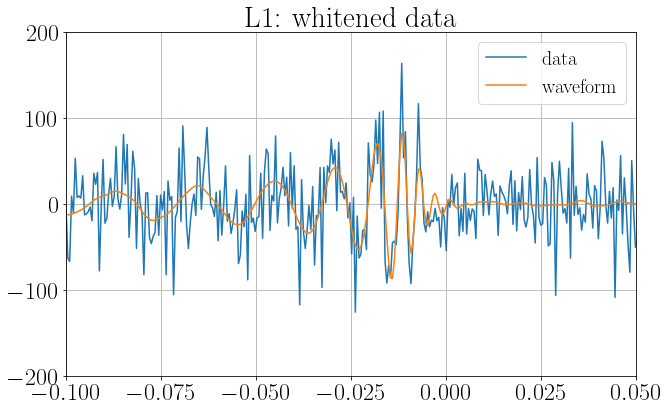

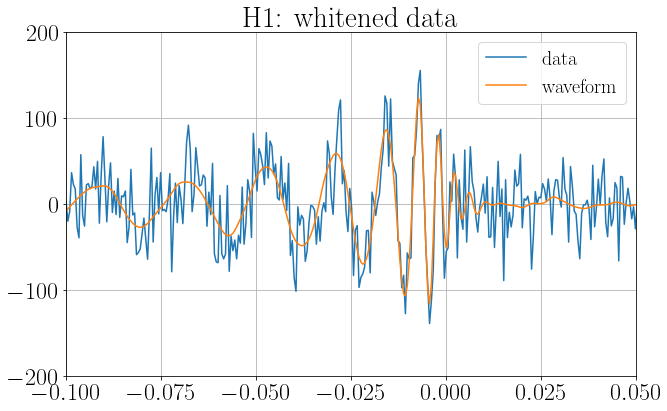

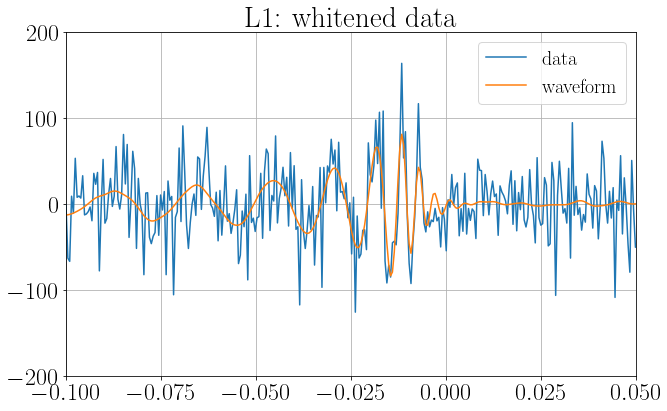

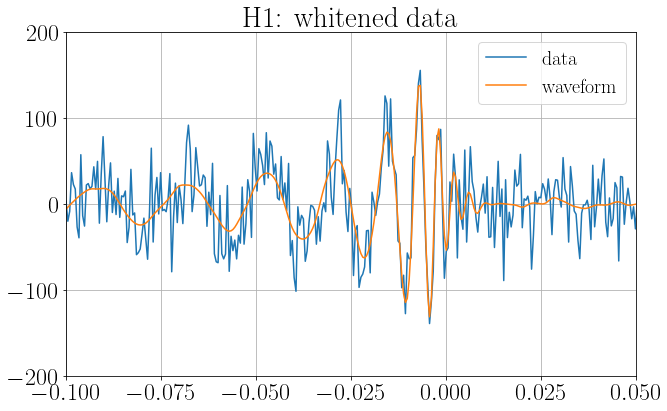

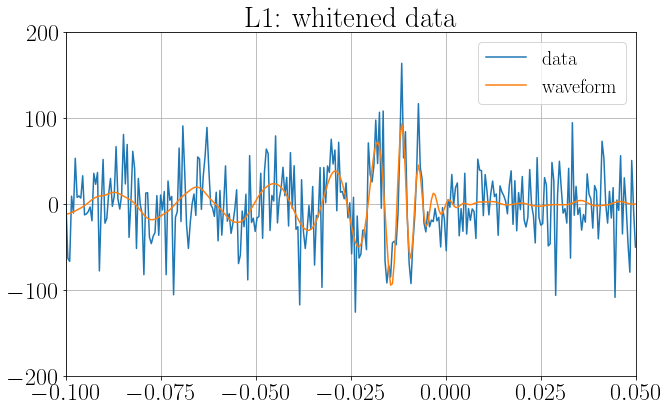

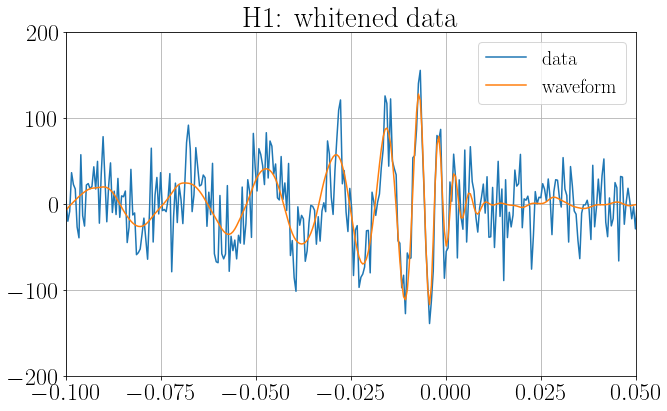

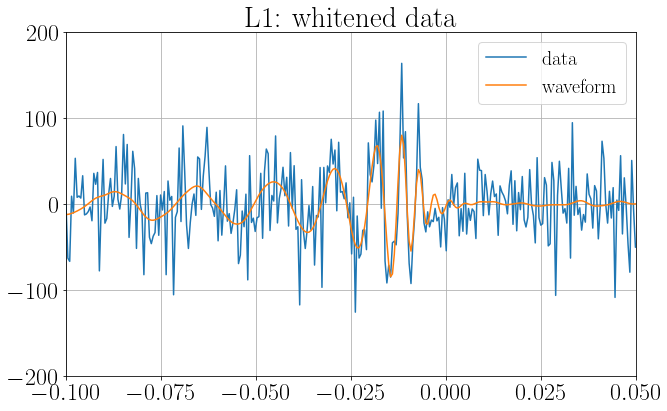

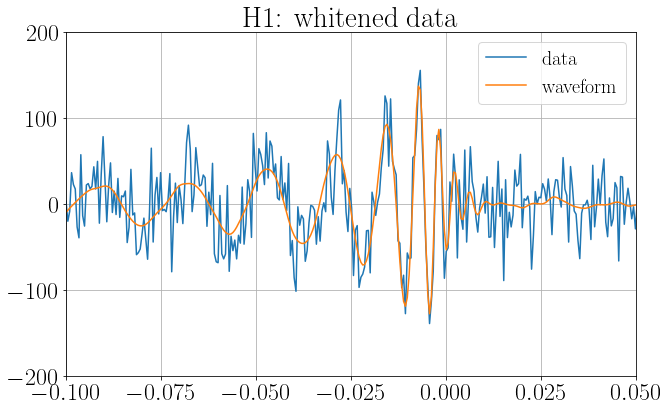

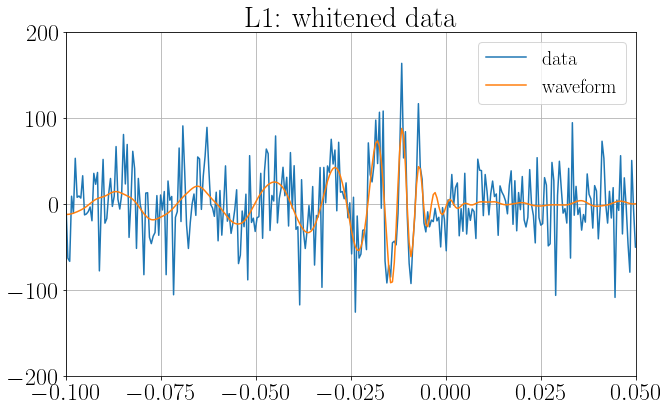

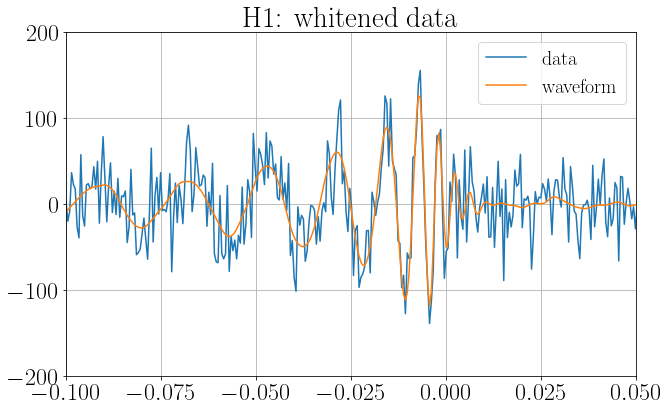

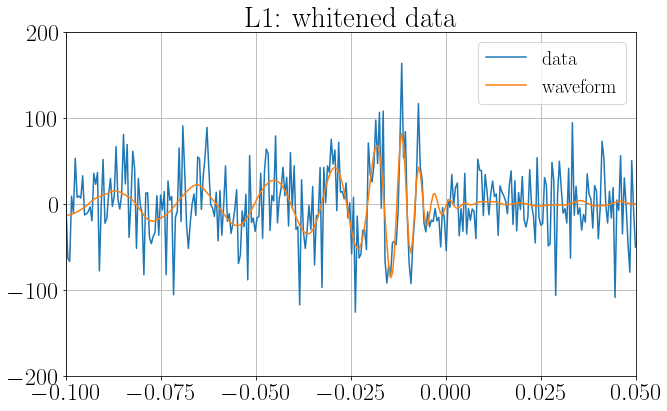

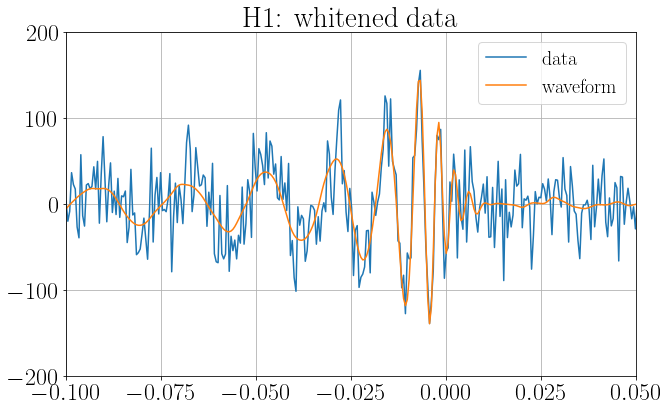

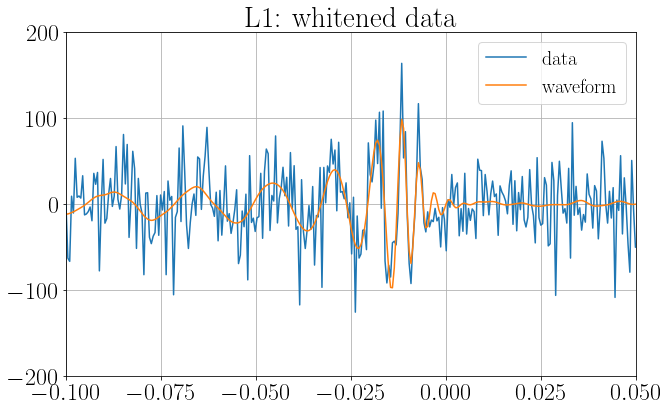

In [25]:
for i in range(-10,-1):
    print(i)
    i = i*1000
    idx = np.argsort(samples['loglikelihood'])[i]
    print(idx)
    params = {p: samples[p][idx] for p in samples.fieldnames}
    params['redshift'] = cosmology.redshift(params['distance'])
    params['comoving_volume'] = cosmology.cosmological_quantity_from_redshift(params['redshift'],'comoving_volume')
    plot_waveform(params)

In [17]:
np.sort(samples['loglikelihood'])[-10]

-341344.43755181925

In [18]:
np.argsort(samples['loglikelihood'])

array([ 4435, 55941, 13752, ..., 33379, 50140,  1263])

In [19]:
samples['loglikelihood'][4435]

-341364.51840245264